Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not


 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi']= 250
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [3]:
df = pd.read_excel('EastWestAirlines .xlsx')
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [4]:
df = df.drop(columns='ID#')
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 11 columns]

In [5]:
df.rename(columns={'Award?':'Award'},inplace=True)

In [6]:
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award  
0         0  
1         0  
2         0  
3         0  
4         1  
...     ...  
3994      1  
3995      1  
3996      1  
3997      0  
3998      0  

[3999 rows x 11 columns]

In [7]:
df.describe()

Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03   3999.000000  3999.000000  3999.000000  3999.000000   
mean   7.360133e+04    144.114529     2.059515     1.014504     1.012253   
std    1.007757e+05    773.663804     1.376919     0.147650     0.195241   
min    0.000000e+00      0.000000     1.000000     1.000000     1.000000   
25%    1.852750e+04      0.000000     1.000000     1.000000     1.000000   
50%    4.309700e+04      0.000000     1.000000     1.000000     1.000000   
75%    9.240400e+04      0.000000     3.000000     1.000000     1.000000   
max    1.704838e+06  11148.000000     5.000000     3.000000     5.000000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    3999.000000   3999.00000        3999.000000      3999.000000   
mean    17144.846212     11.60190         460.055764         1.373593   
std     24150.967826      9.60381        1400.209171         3.793172   
min         0.000000      0.00000           0.000000         0.000000   
25%      1250.000000      3.00000           0.000000         0.000000   
50%      7171.000000     12.00000           0.000000         0.000000   
75%     23800.500000     17.00000         311.000000         1.000000   
max    263685.000000     86.00000       30817.000000        53.000000   

       Days_since_enroll        Award  
count         3999.00000  3999.000000  
mean          4118.55939     0.370343  
std           2065.13454     0.482957  
min              2.00000     0.000000  
25%           2330.00000     0.000000  
50%           4096.00000     0.000000  
75%           5790.50000     1.000000  
max           8296.00000     1.000000

In [8]:
df.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

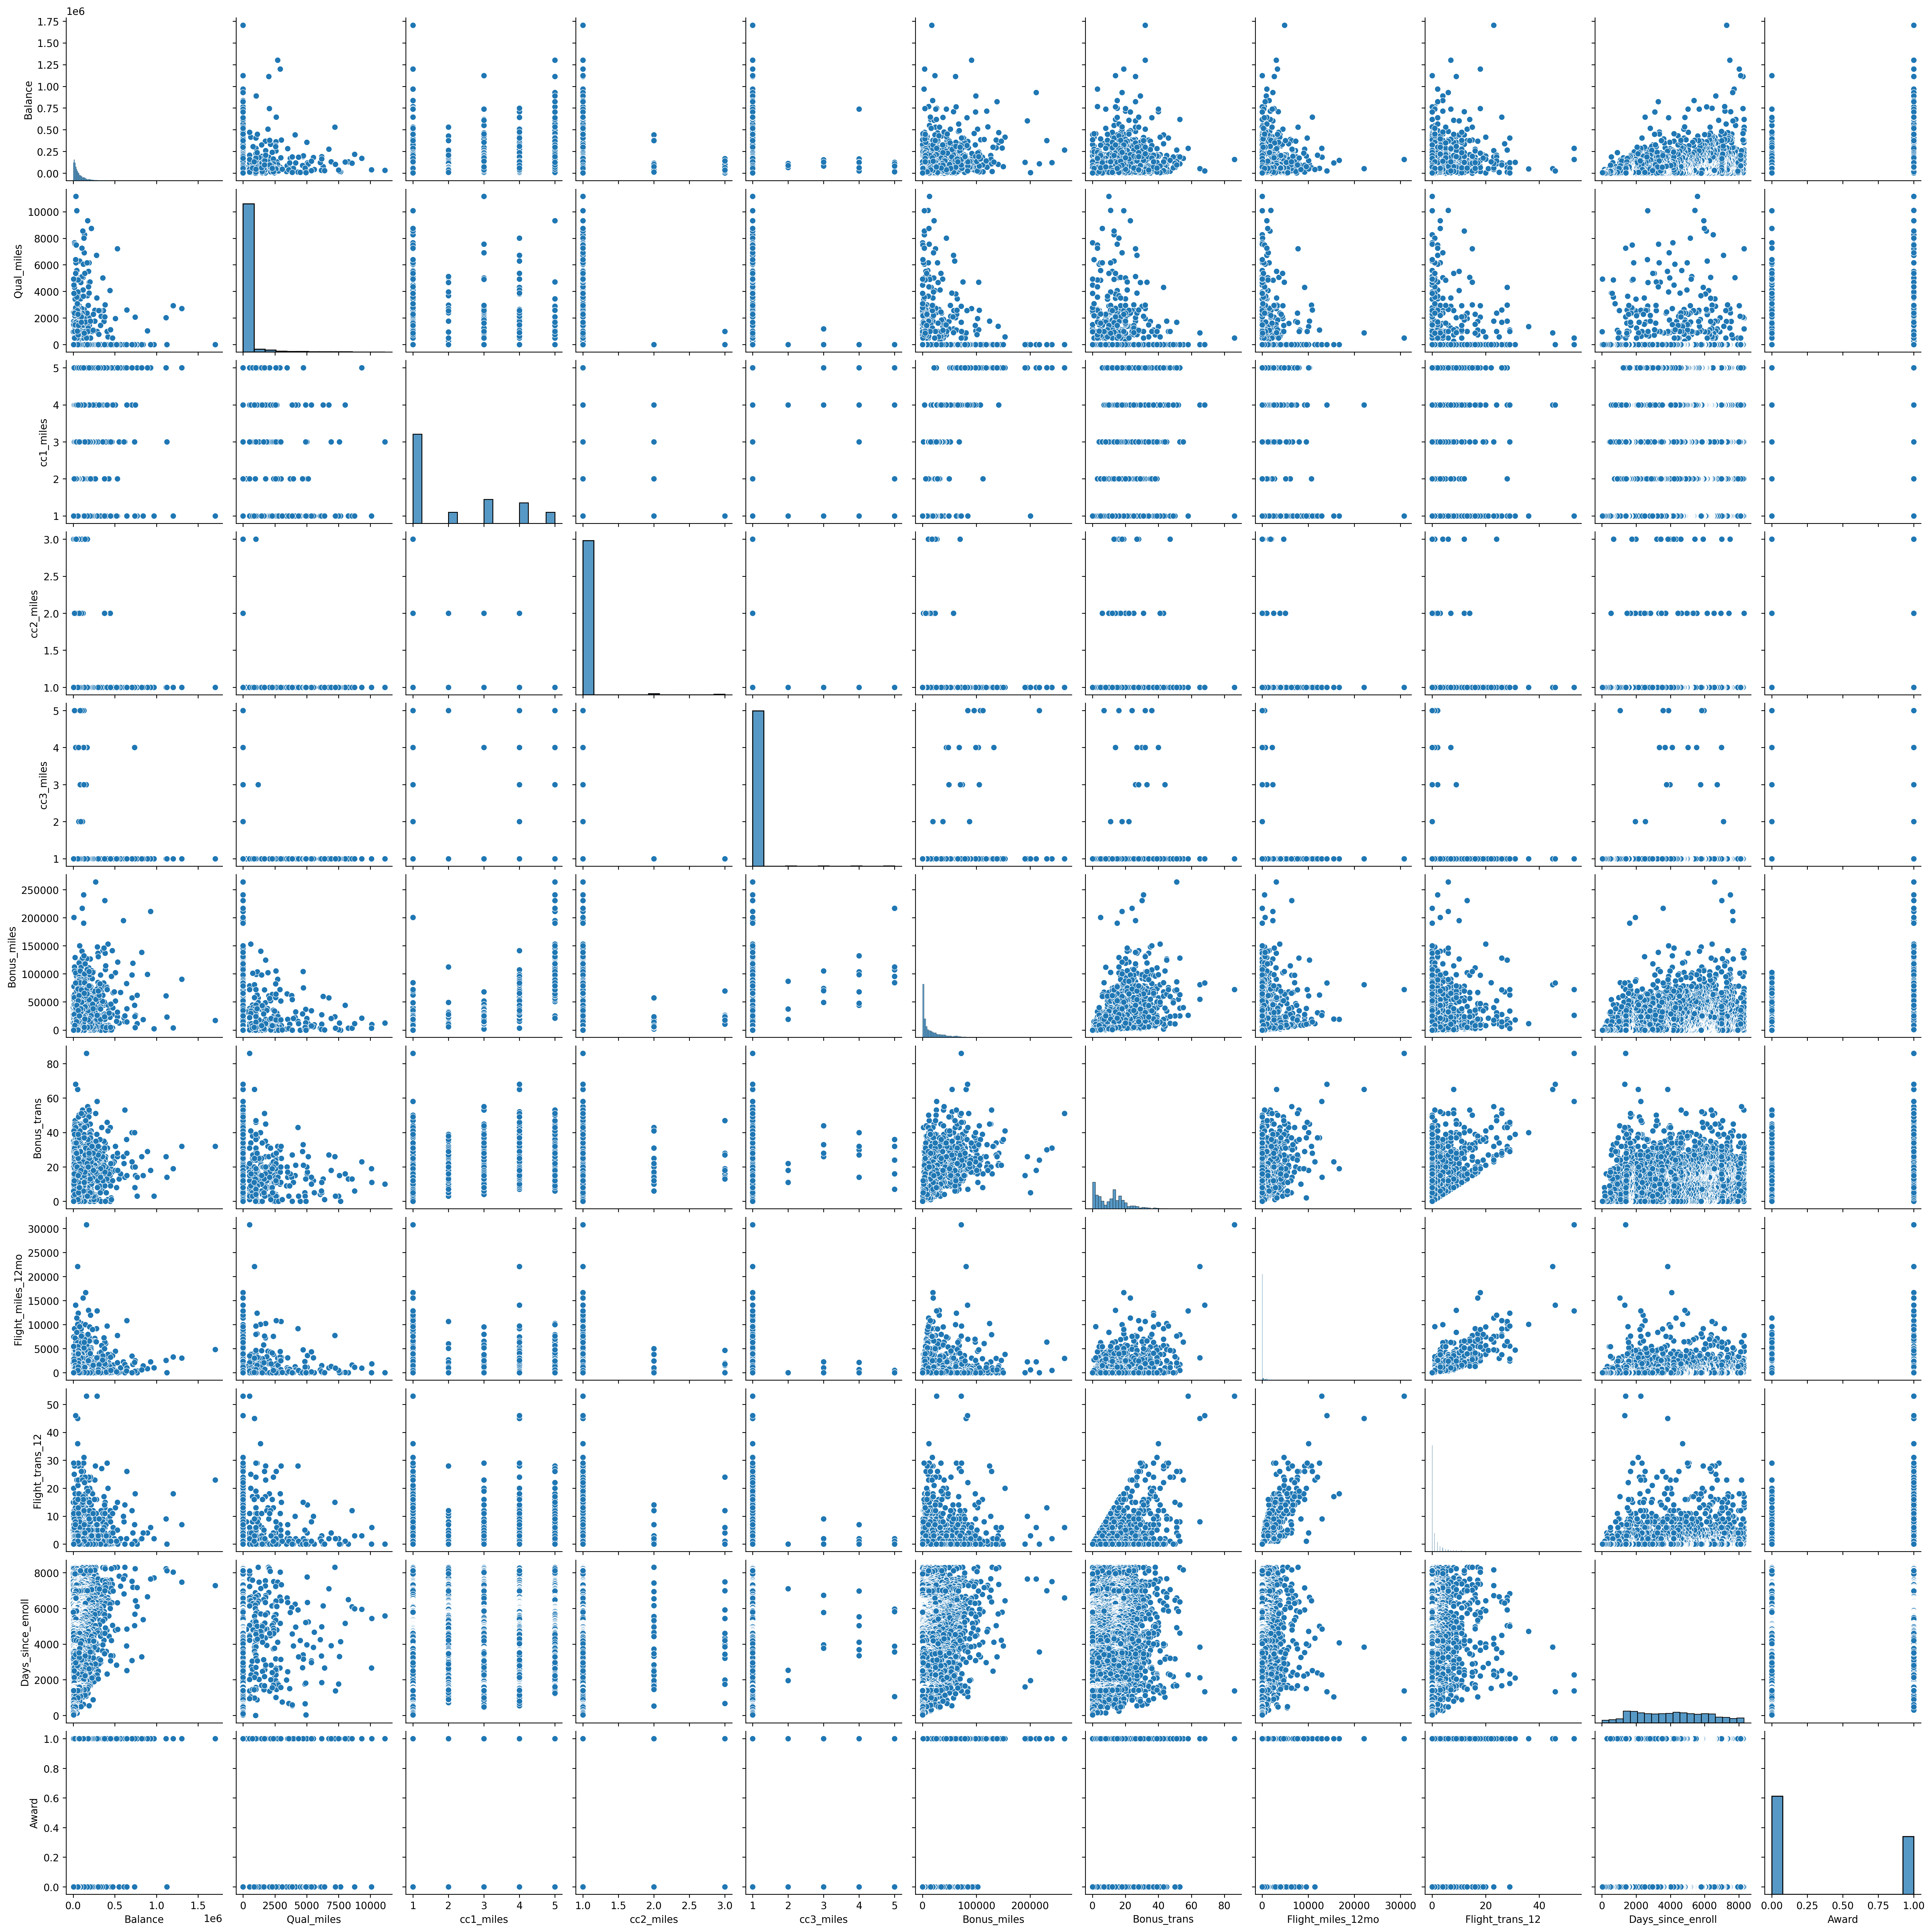

In [9]:
sns.pairplot(df)

# Feature Scaling

In [10]:
sc = StandardScaler()

df = sc.fit_transform(df)


In [11]:
#Dendrogram with single and complite Linkage

In [12]:
from scipy.cluster import hierarchy

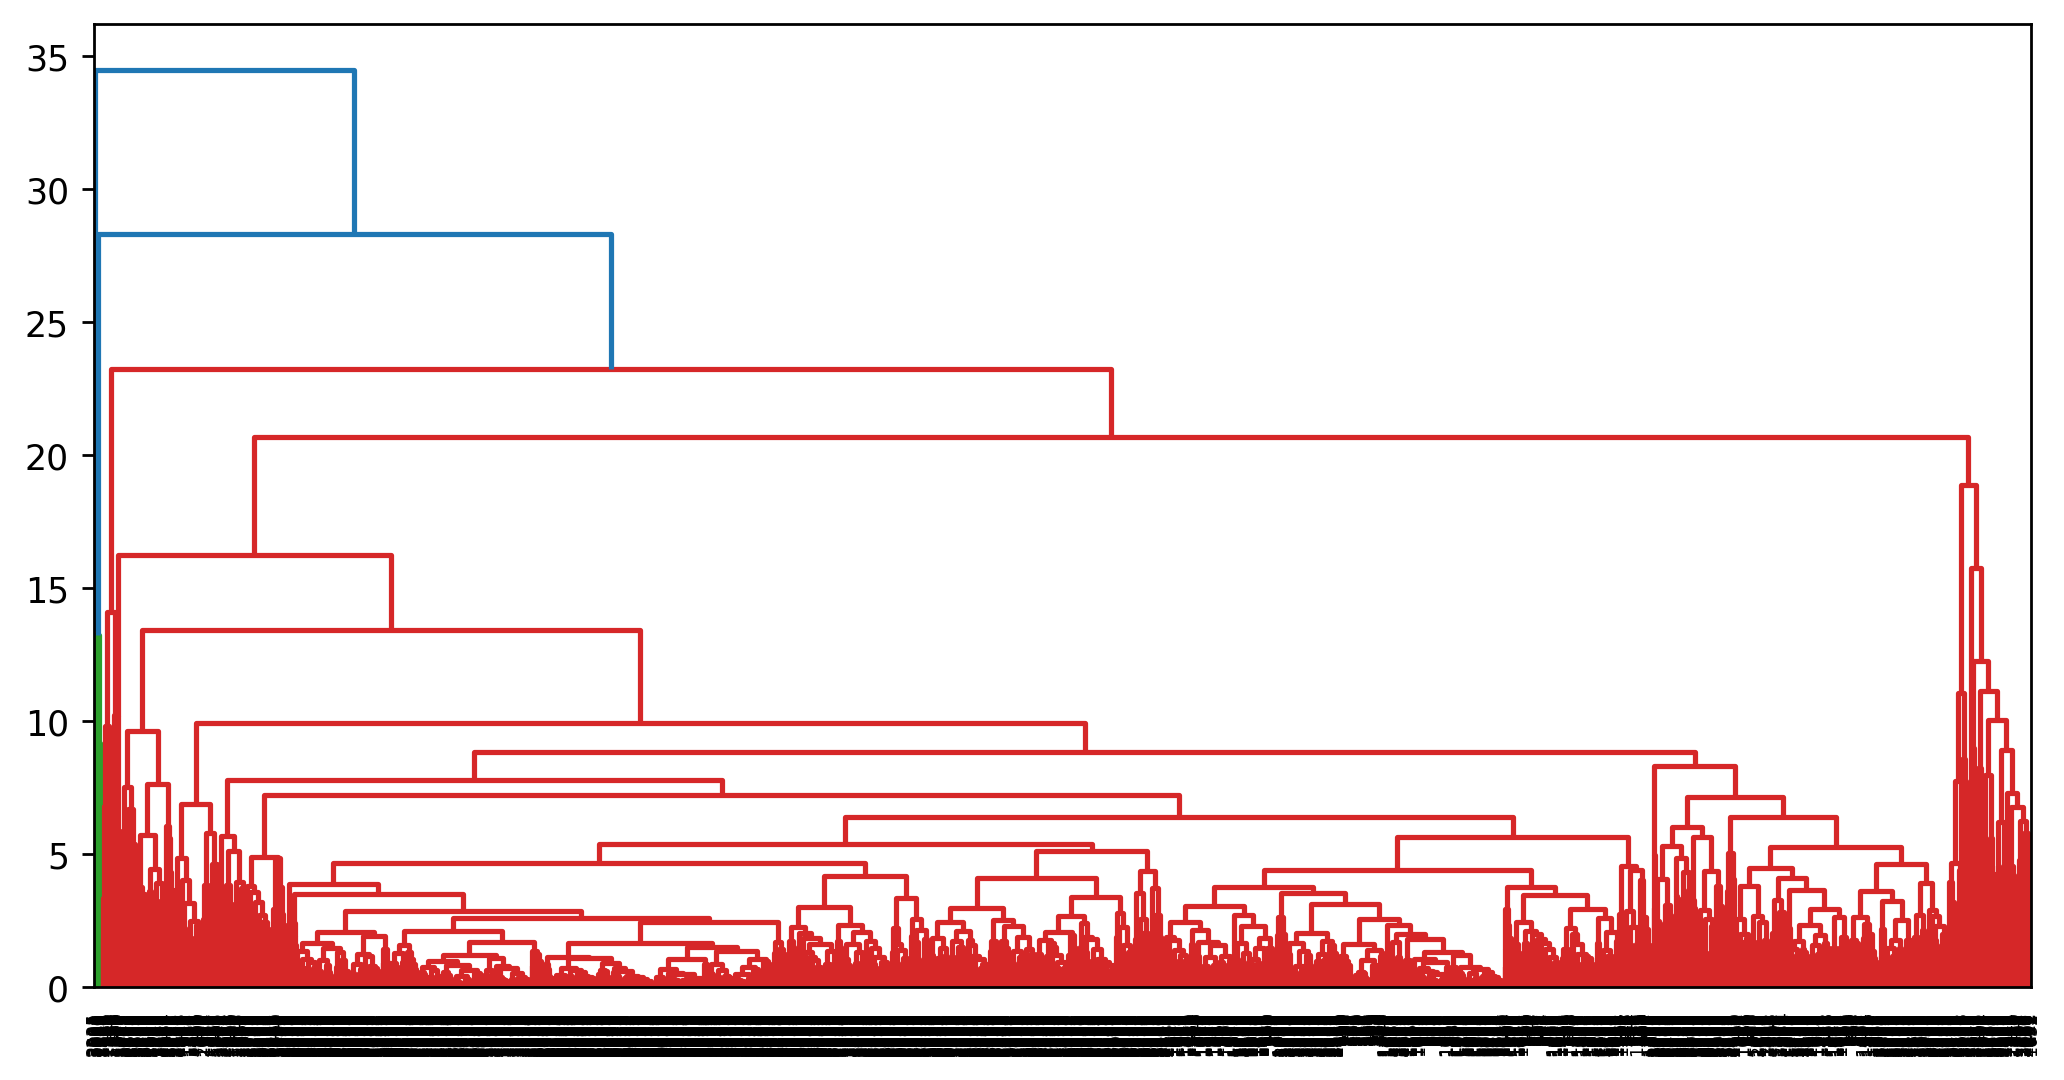

In [13]:
lk = hierarchy.linkage(df,method='complete')
dendro = hierarchy.dendrogram(lk)
plt.show()

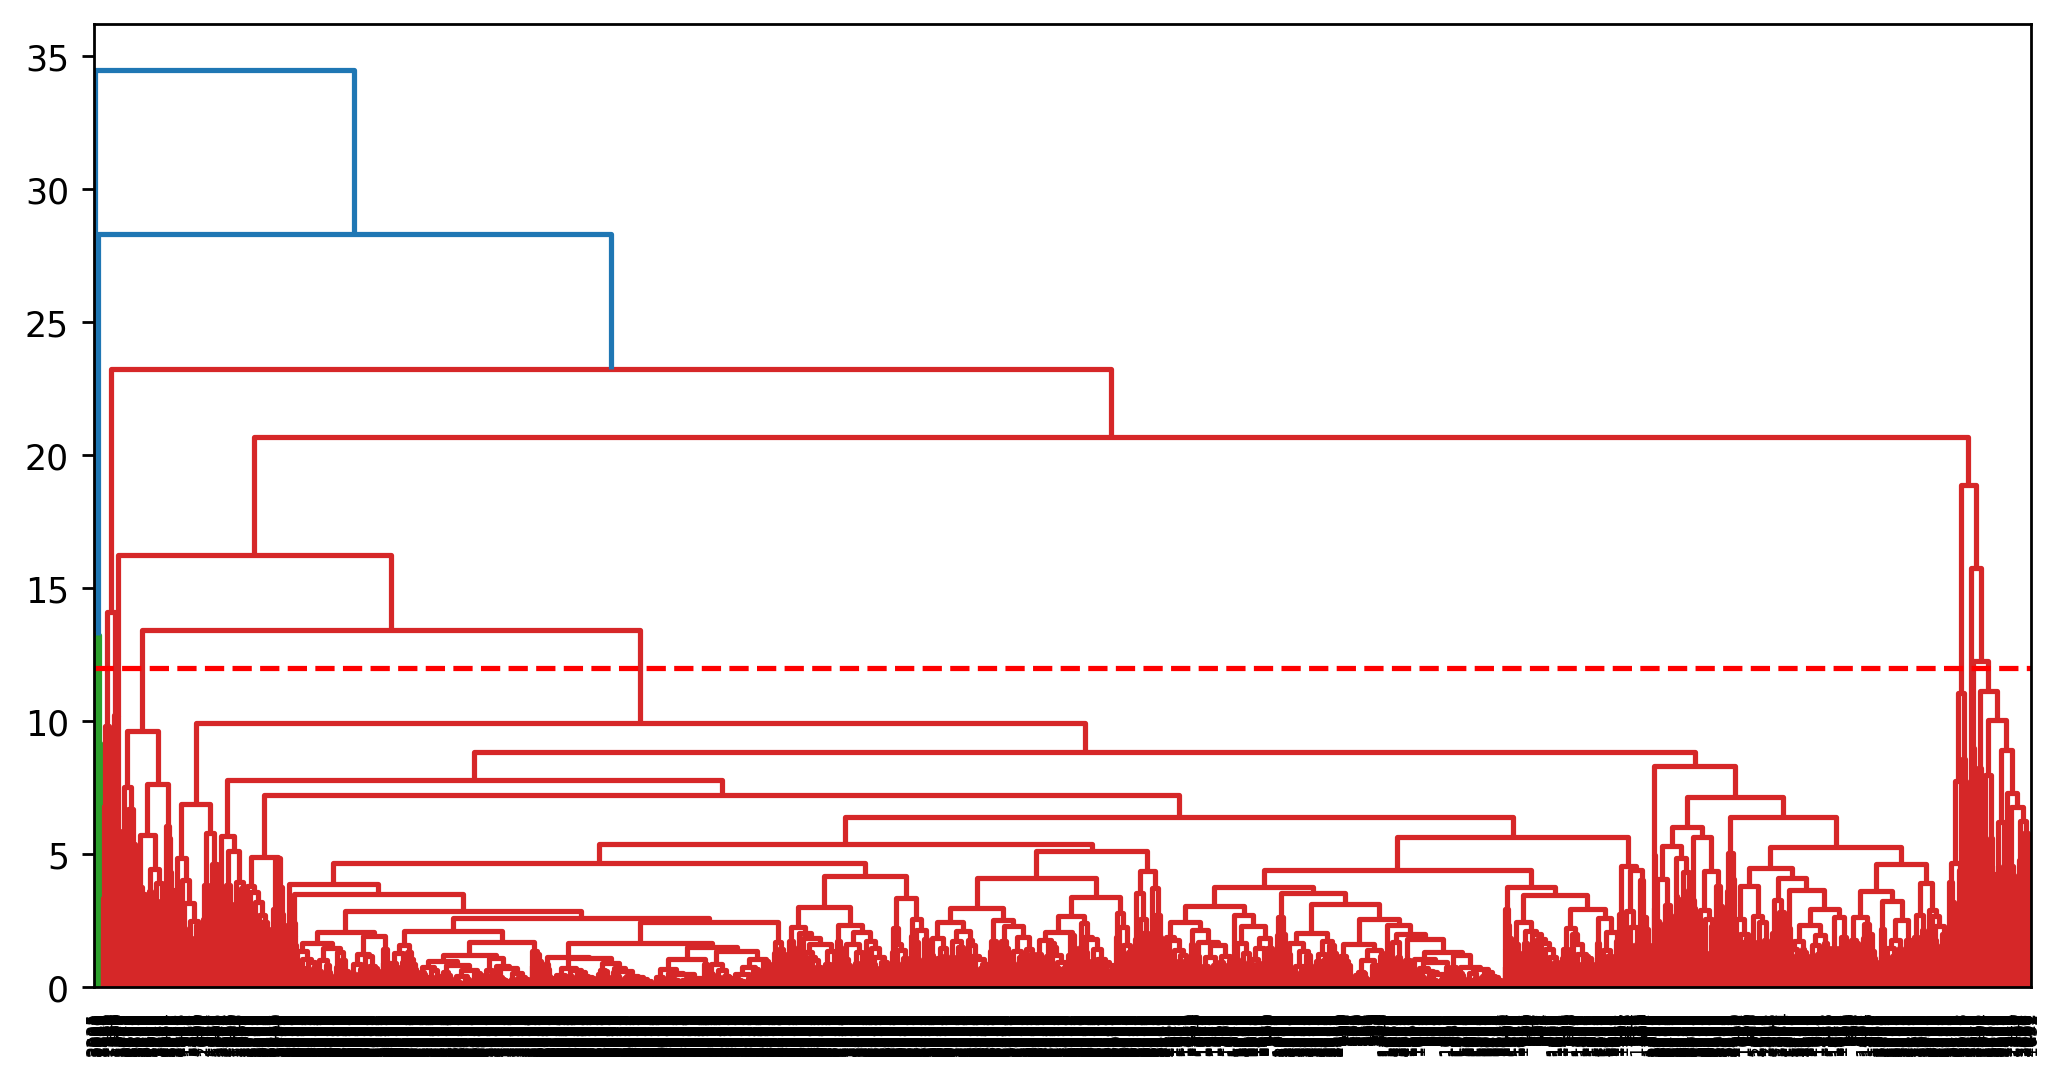

In [14]:
dendro = hierarchy.dendrogram(lk)
plt.axhline(y = 12,linestyle='--',color='r')

# model Building

In [15]:
from sklearn.cluster import AgglomerativeClustering

In [16]:
hc = AgglomerativeClustering(n_clusters=4)
y = hc.fit_predict(df)

In [17]:
y

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [18]:
dt = pd.read_excel('EastWestAirlines .xlsx')
dt

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [19]:
dt['Cluster'] = y

In [20]:
dt

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  Cluster  
0          0        1  
1          0        1  
2          0        1  
3          0        1  
4          1        0  
...      ...      ...  
3994       1        1  
3995       1        1  
3996       1        0  
3997       0        1  
3998       0        1  

[3999 rows x 13 columns]

In [21]:
dt.rename(columns={'Award?':'Award'},inplace=True)

In [22]:
dt = dt.drop(columns='ID#')

In [23]:
dt

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award  Cluster  
0         0        1  
1         0        1  
2         0        1  
3         0        1  
4         1        0  
...     ...      ...  
3994      1        1  
3995      1        1  
3996      1        0  
3997      0        1  
3998      0        1  

[3999 rows x 12 columns]

In [24]:
dt.groupby('Cluster').agg('mean')

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Cluster                                                               
0        116314.450725  363.839130   3.498551   1.000000   1.035507   
1         46329.336877    9.028618   1.244072   1.000000   1.000000   
2        134880.892308  393.323077   2.430769   1.000000   1.000000   
3         68876.581395   23.255814   1.139535   2.348837   1.000000   

          Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
Cluster                                                                  
0        37150.356522    18.066667         377.000000         1.150000   
1         4868.112428     6.907604         214.812756         0.673753   
2        36582.169231    29.338462        5915.523077        16.638462   
3        14689.837209    17.534884         582.627907         2.209302   

         Days_since_enroll     Award  
Cluster                               
0              4696.888406  0.663043  
1              3769.337694  0.184383  
2              4599.607692  0.753846  
3              3968.930233  0.395349

<Axes: xlabel='Balance', ylabel='Bonus_trans'>

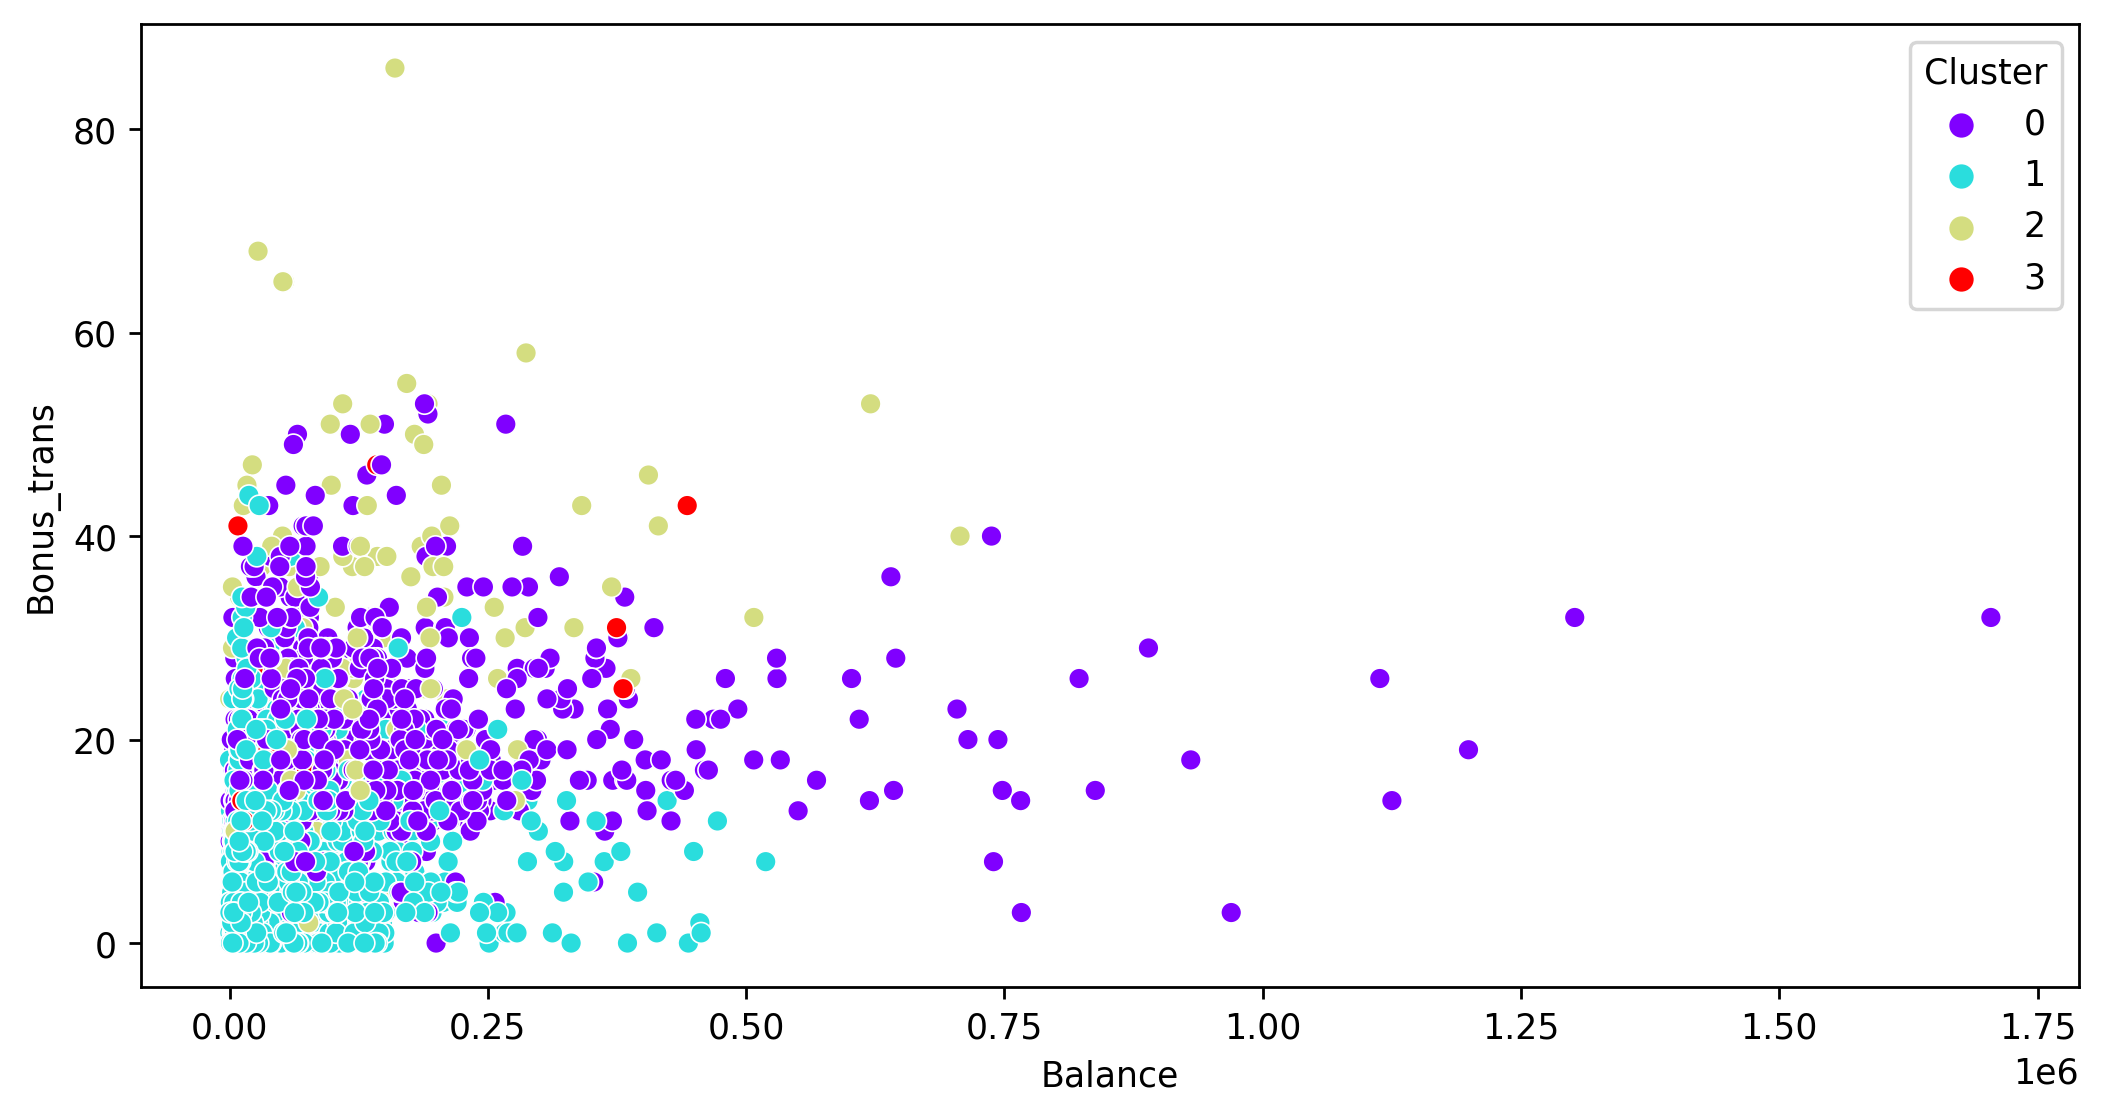

In [25]:
sns.scatterplot(x = dt['Balance'], y = dt['Bonus_trans'],hue = dt['Cluster'],palette='rainbow')

# KMeans

In [28]:
from sklearn.cluster import KMeans

In [29]:
km = KMeans()
y = km.fit_predict(df)

In [30]:
km.cluster_centers_

array([[ 6.42787817e-01, -1.06246662e-01,  1.55562670e+00,
        -9.82418871e-02, -5.02726250e-02,  1.36988578e+00,
         8.70373375e-01, -5.07964342e-02, -5.09150973e-02,
         4.06071862e-01,  5.38718464e-01],
       [-3.87755253e-01, -1.44345997e-01, -5.88146828e-01,
        -9.82418871e-02, -6.27665798e-02, -5.28307335e-01,
        -5.21336656e-01, -2.21689246e-01, -2.43801729e-01,
        -9.75222109e-01, -7.66919299e-01],
       [-1.53151141e-01, -5.83664081e-02, -2.64720468e-01,
        -9.82418871e-02, -6.27665798e-02, -2.71672161e-01,
        -1.03564877e-01, -2.74580340e-02, -2.07060165e-02,
         6.58849698e-02,  1.30391816e+00],
       [ 1.24463396e+00,  4.86198029e-01,  2.36594659e-01,
        -9.82418871e-02, -6.27665798e-02,  8.04931022e-01,
         1.89972964e+00,  4.05535908e+00,  4.30382999e+00,
         3.11921808e-01,  9.30488454e-01],
       [-1.38414986e-01, -1.43717877e-01, -4.04529545e-01,
        -9.82418871e-02, -5.74801800e-02, -4.49284222e-01,
  

# Elbow Graph

In [32]:
wcss=[]

for i in range (1,21):
    km= KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

In [33]:
wcss

[43988.99999999999,
 35409.5166298613,
 30899.246824652193,
 27153.772431502766,
 23706.562401543495,
 21470.928861432774,
 19933.25177964421,
 17316.75578215064,
 15964.91839772317,
 14726.983322766791,
 13708.01348490224,
 12946.438421930137,
 12428.393908143422,
 12024.889822275054,
 11617.864230819268,
 11130.556438085878,
 10758.483586286193,
 10371.58017157323,
 10081.722909209191,
 9733.815488077242]

Text(0.5, 1.0, 'Elbow Curve')

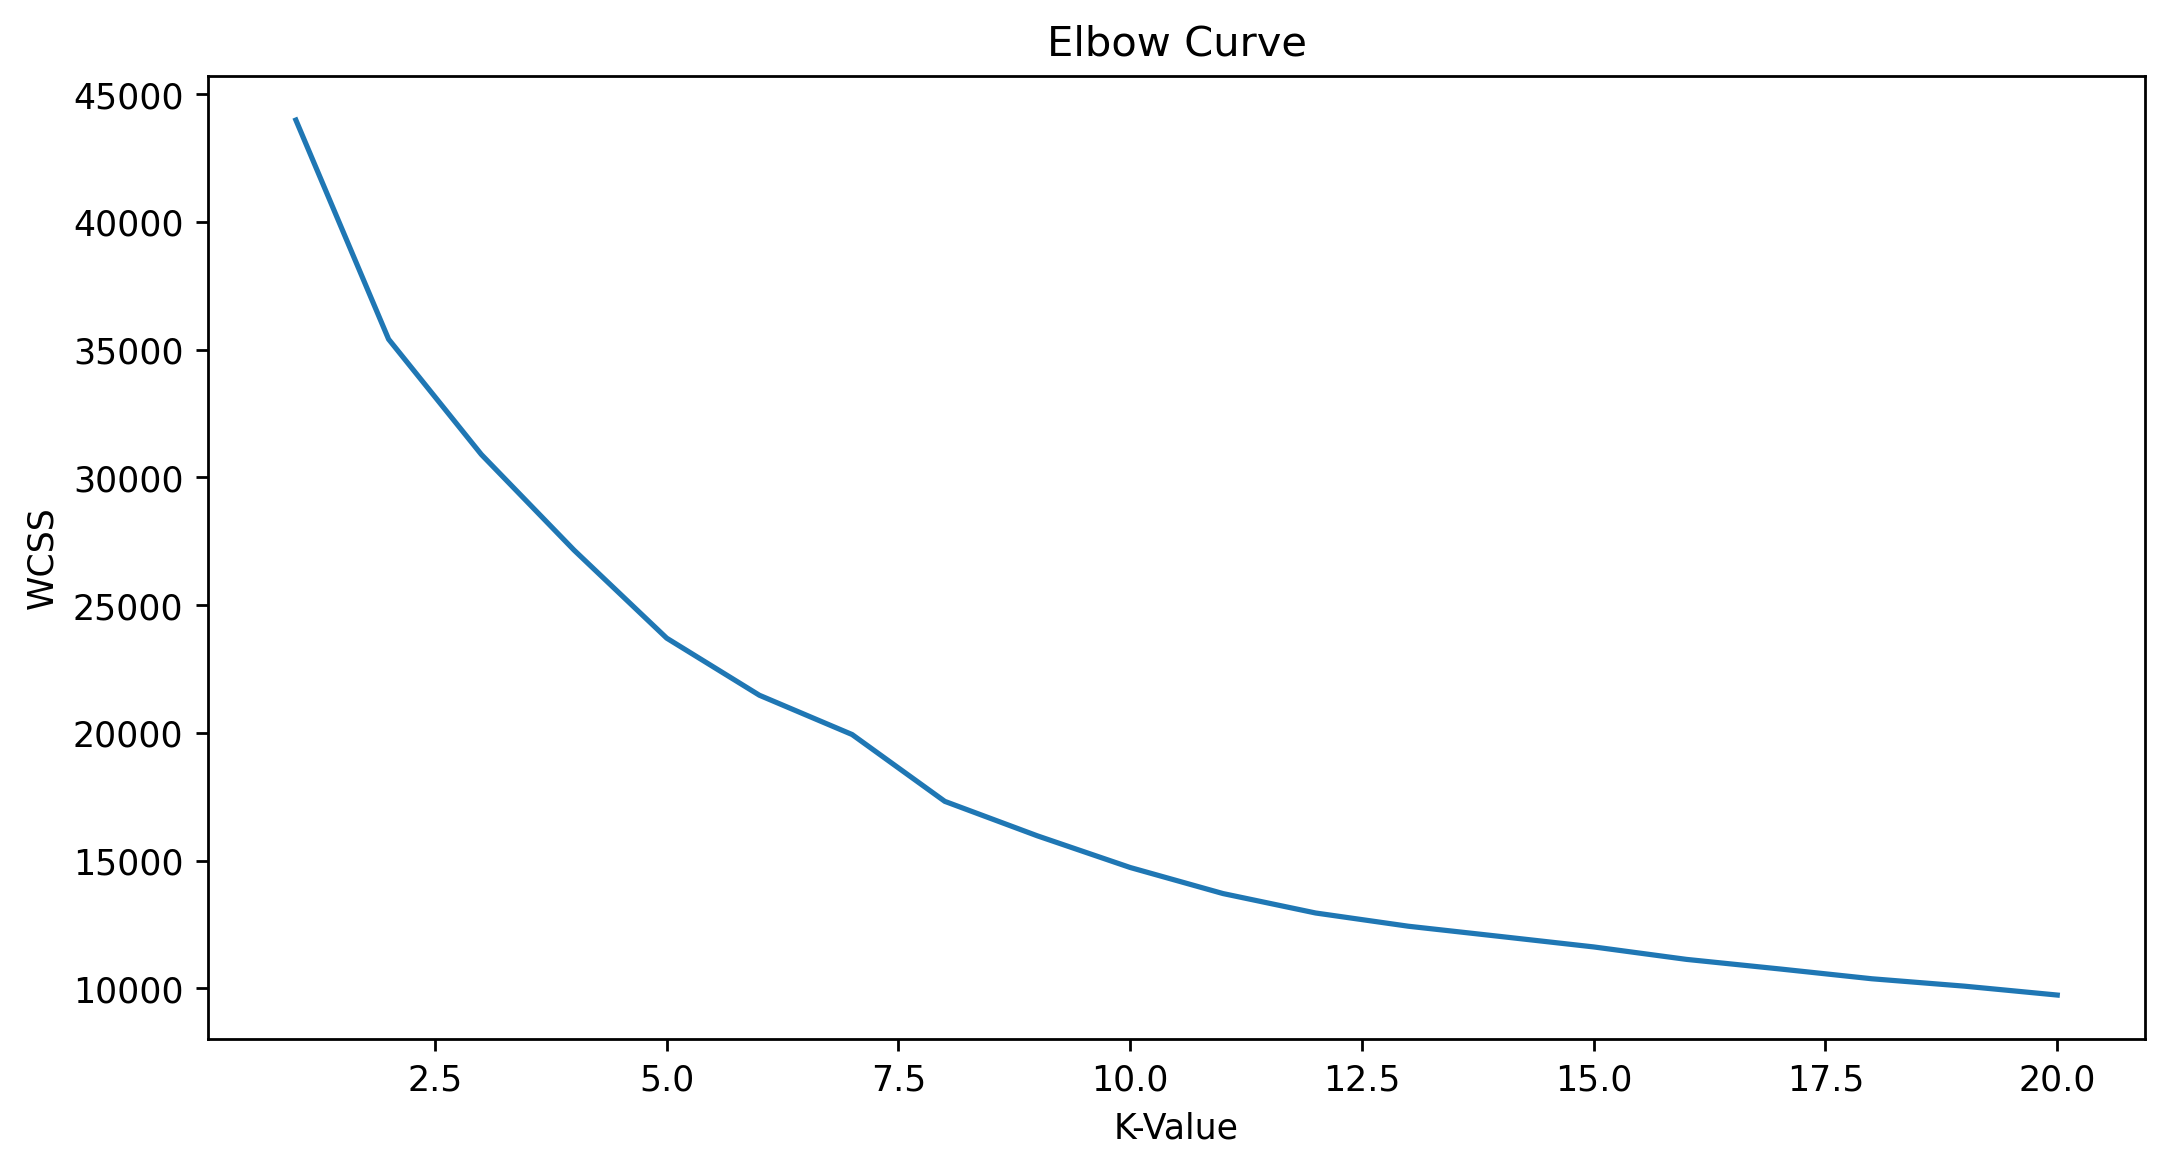

In [34]:
plt.plot(range(1,21), wcss)
plt.xlabel('K-Value')
plt.ylabel('WCSS')
plt.title('Elbow Curve')

# Evaluation of K-Means

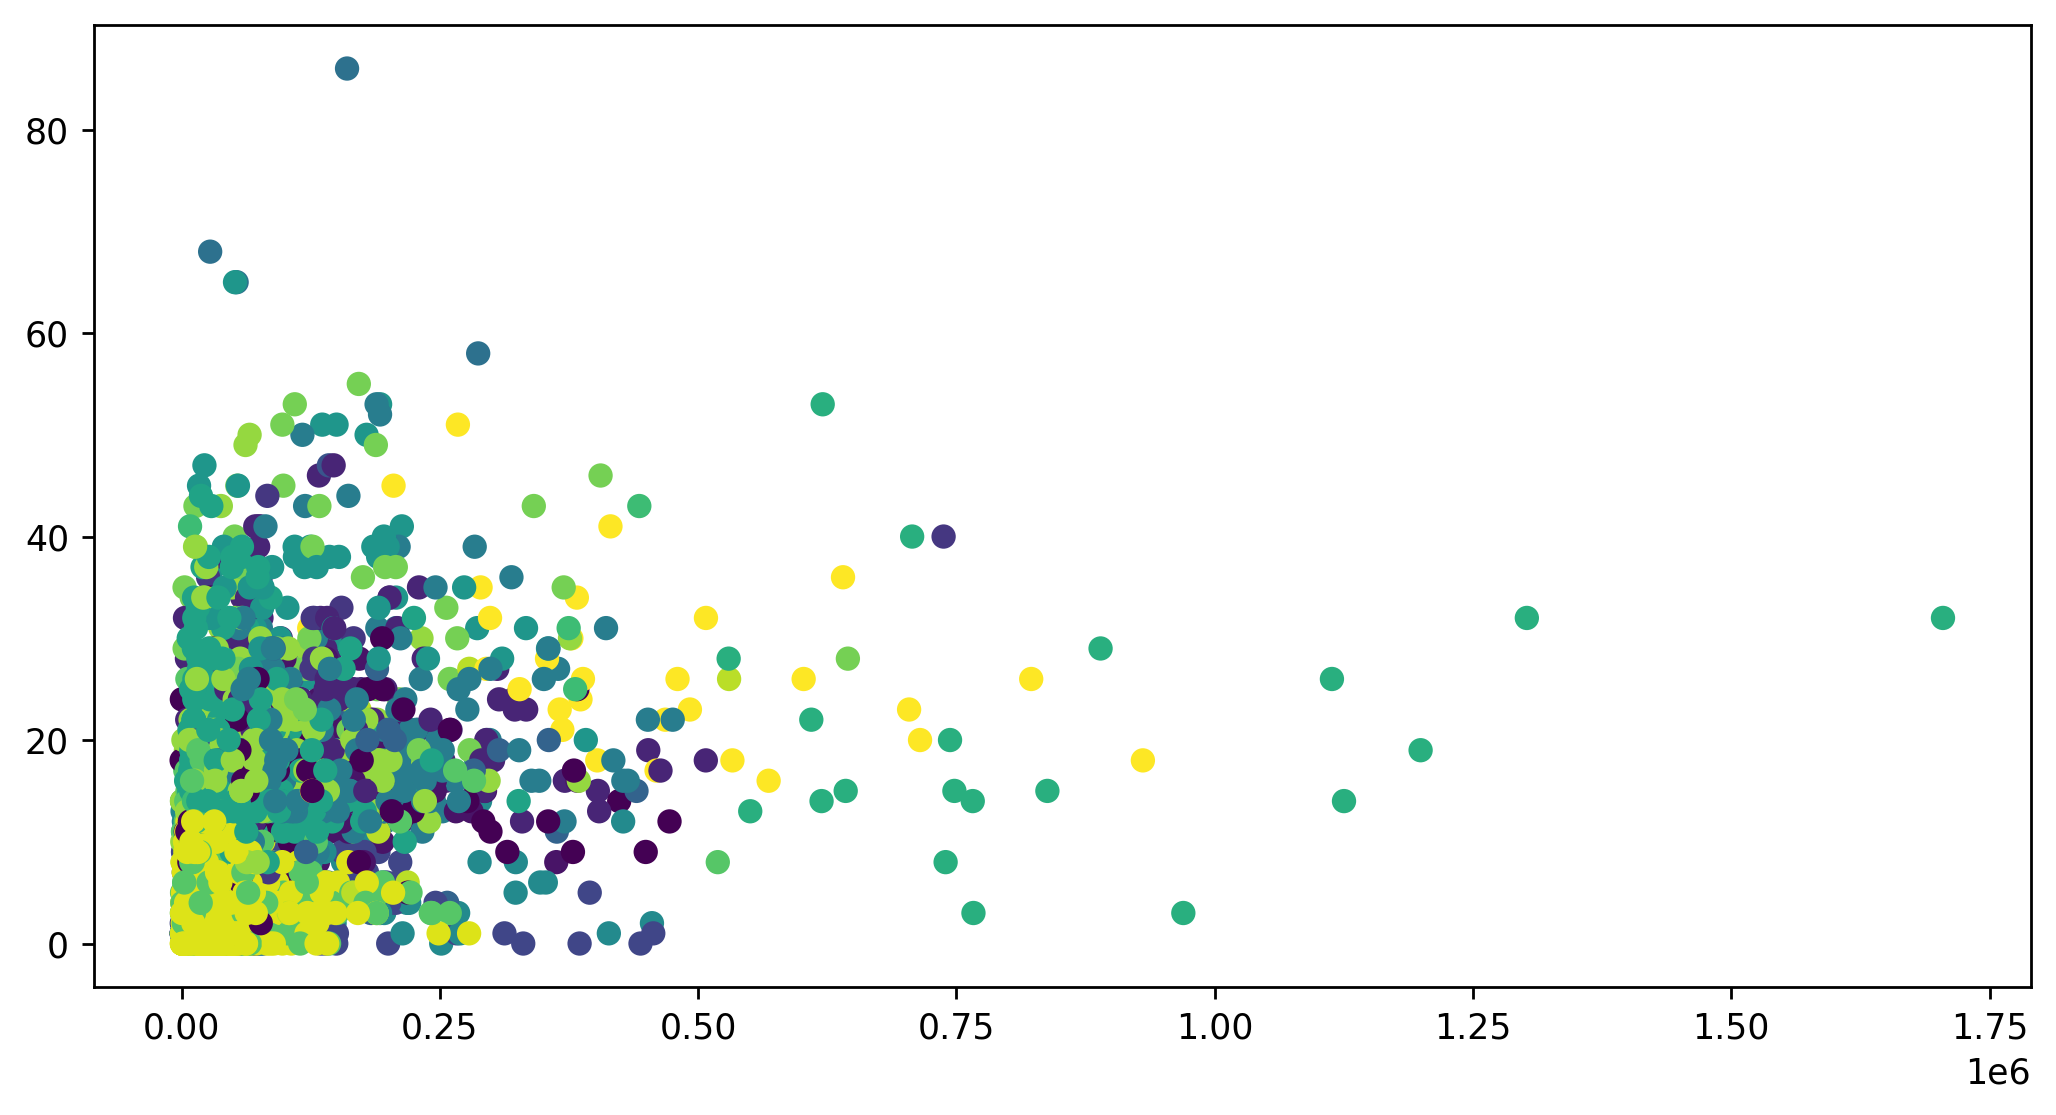

In [35]:
plt.scatter(x = dt['Balance'],y = dt['Bonus_trans'],c=km.labels_)
plt.show()

In [36]:
from sklearn.metrics import silhouette_score

In [37]:
silhouette_score(df,y)

0.23680303467419028

In [38]:
!pip install yellowbrick

In [42]:
from yellowbrick.cluster import SilhouetteVisualizer

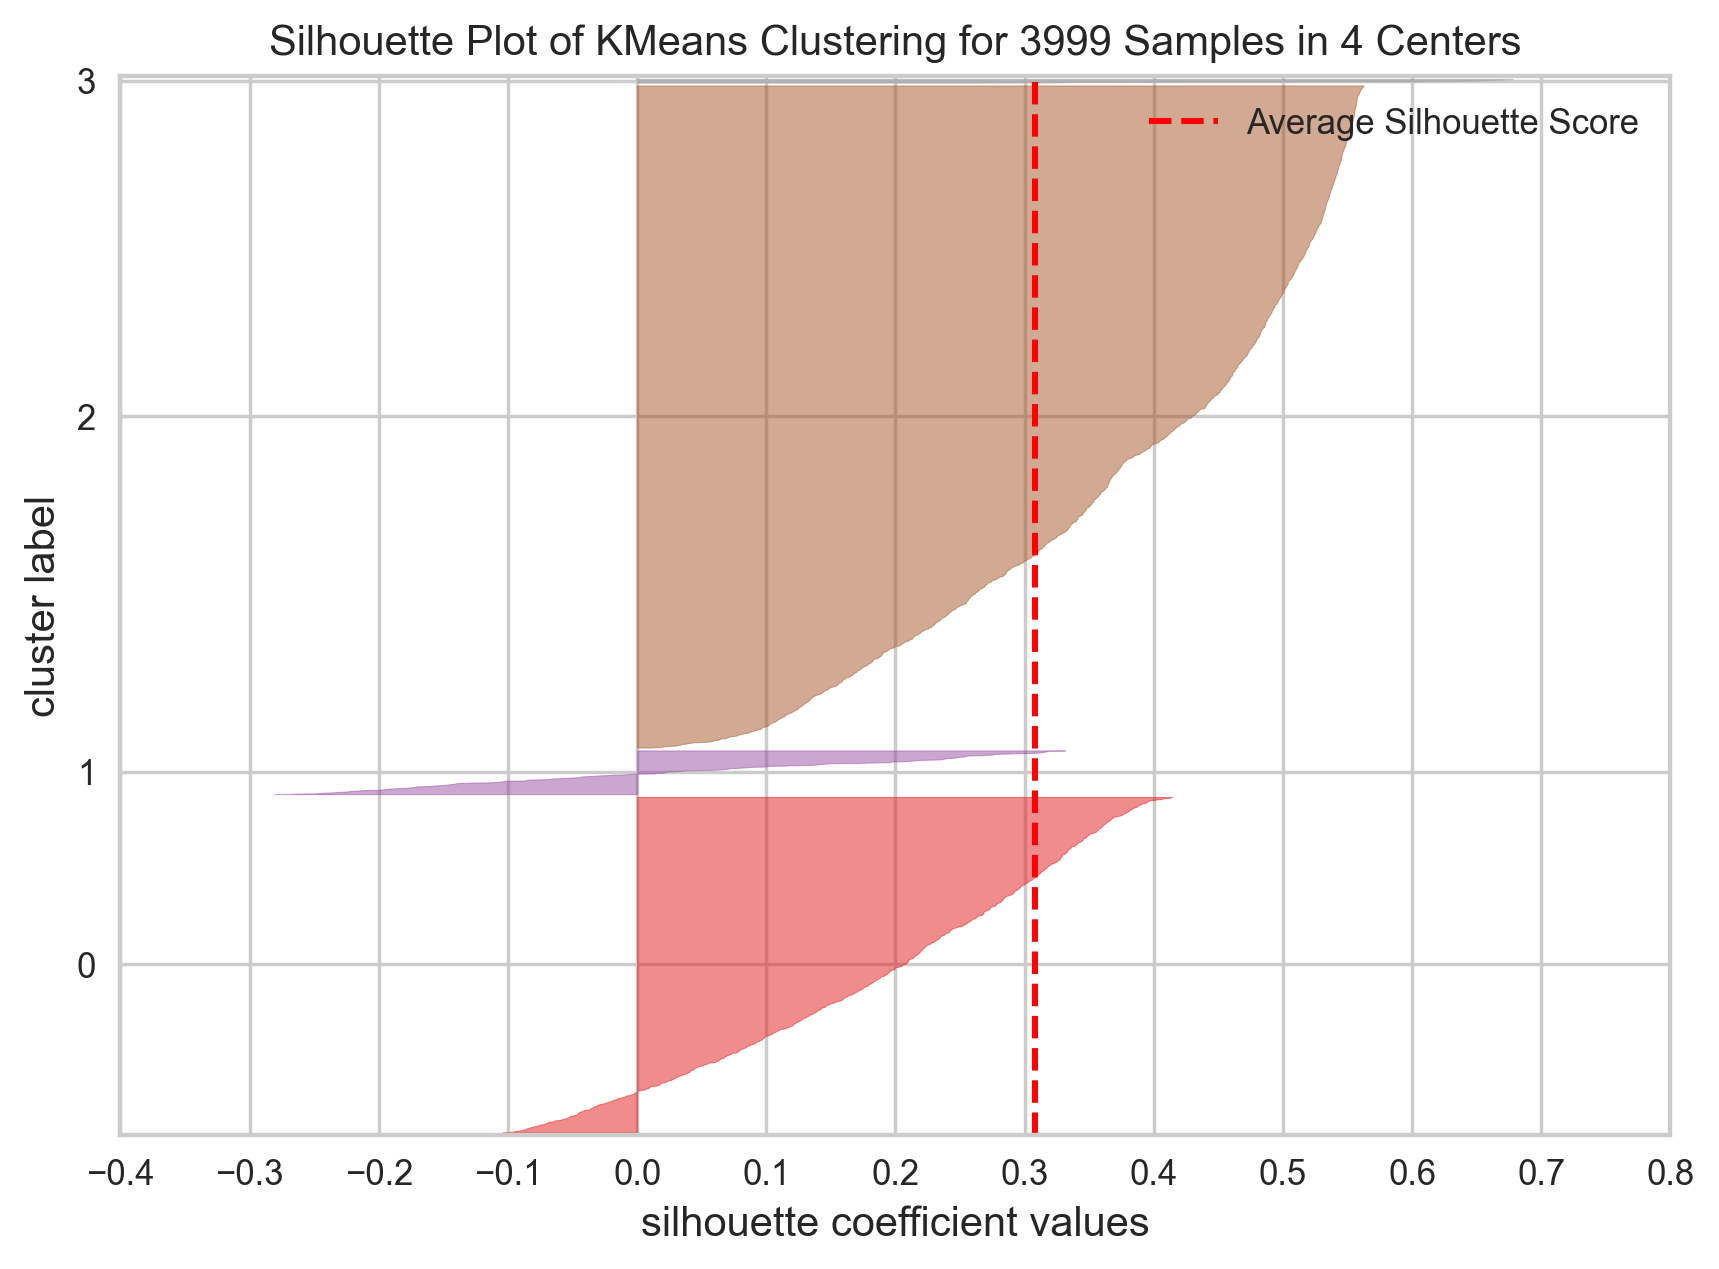

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 3999 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [43]:
model = SilhouetteVisualizer(KMeans(n_clusters=4))
vis = model.fit(df)
vis.show()

In [44]:
sil_score = []

for i in range(2,20):
    km = KMeans(n_clusters=i)
    y = km.fit_predict(df)
    sil_score.append(silhouette_score(df,y))

In [45]:
sil_score

[0.32542136327826215,
 0.3105842653255084,
 0.3250492238569637,
 0.2685025900553163,
 0.2754126316110116,
 0.2836086121024986,
 0.2804660063298695,
 0.2978800353391076,
 0.2615190373012682,
 0.26798200569388936,
 0.2748298862674003,
 0.27205620599243113,
 0.2782258460597246,
 0.27566852354905336,
 0.27041279759737086,
 0.27025315430600516,
 0.27505425022485563,
 0.26472789681900943]

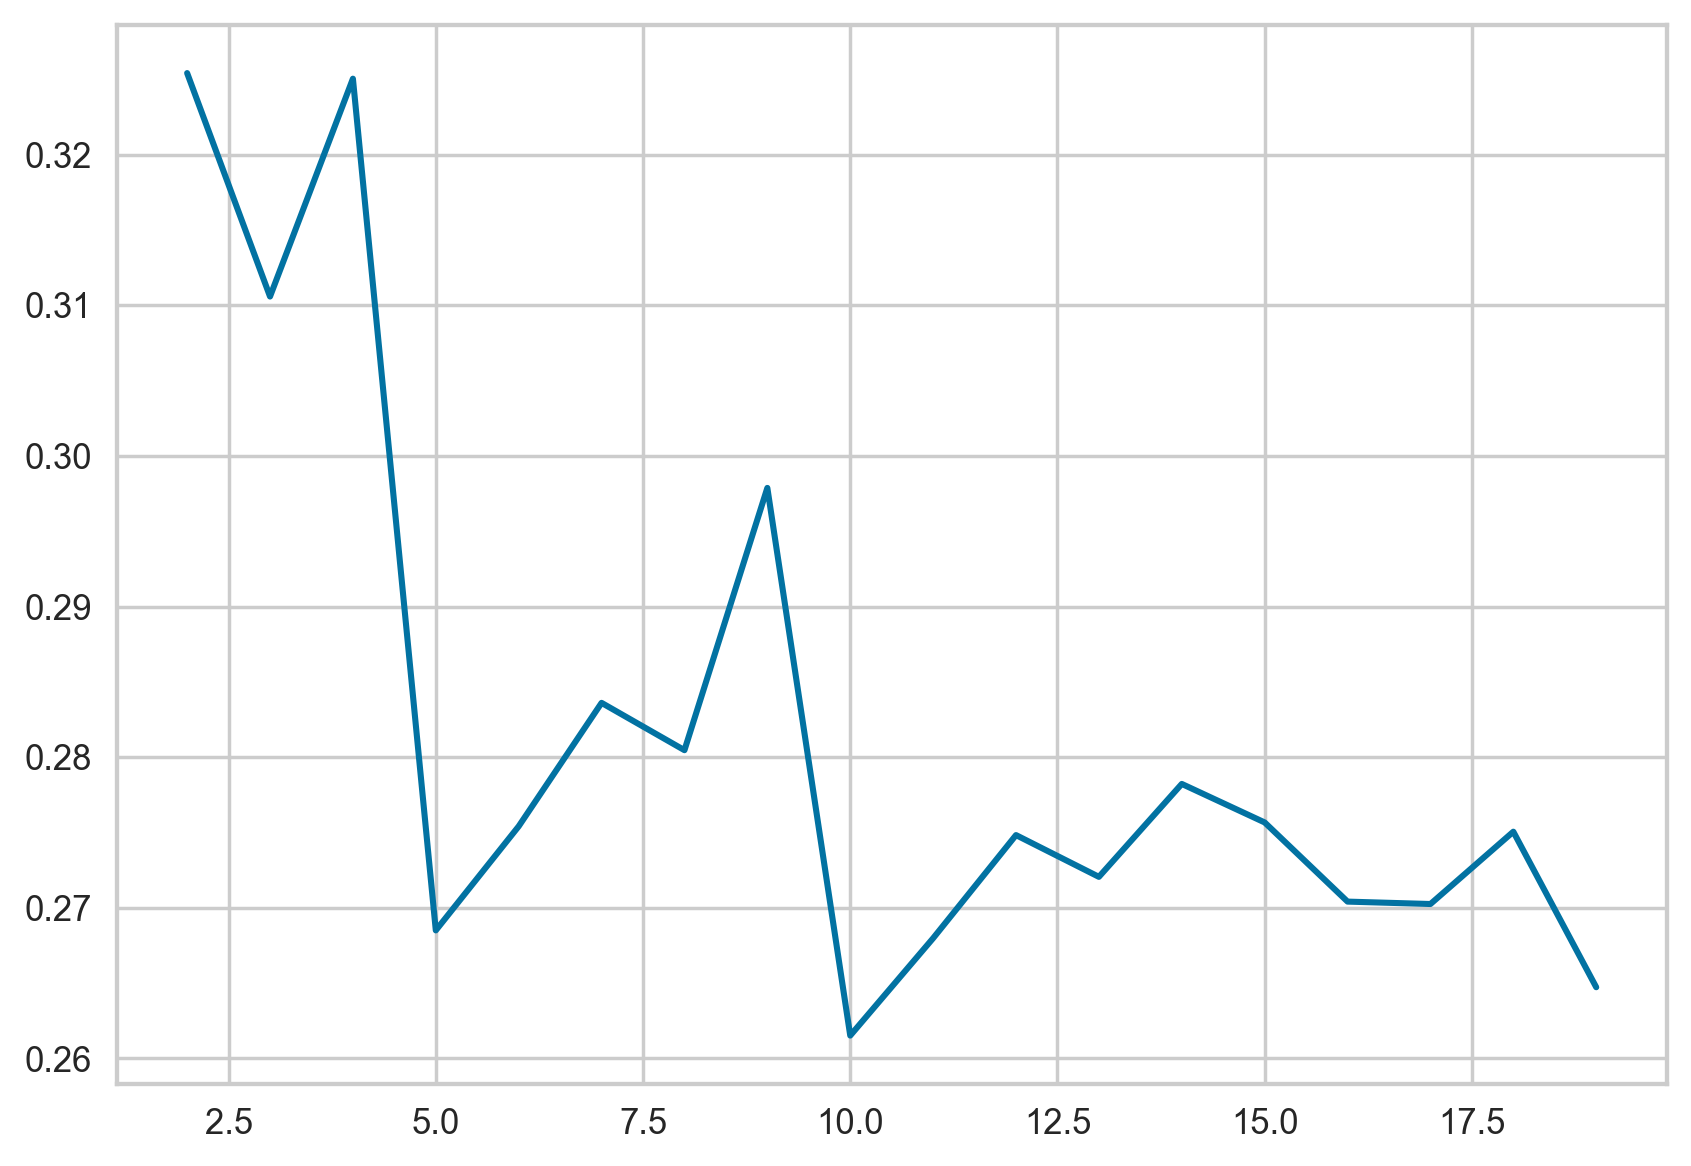

In [47]:
plt.plot(range(2,20),sil_score)

In [48]:
dt['Cluster'] = y
dt

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award  Cluster  
0         0        3  
1         0        3  
2         0        3  
3         0        3  
4         1        5  
...     ...      ...  
3994      1       11  
3995      1       11  
3996      1       17  
3997      0        0  
3998      0        0  

[3999 rows x 12 columns]

In [49]:
dt.groupby('Cluster').agg('mean')

Balance   Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Cluster                                                                
0         27727.133159    12.856397   1.016971        1.0   1.000000   
1        133966.611842     9.453947   3.549342        1.0   1.000000   
2        738166.142857   306.571429   3.400000        1.0   1.000000   
3         46194.576369    17.077810   1.090778        1.0   1.001441   
4        138061.400000    78.800000   3.466667        1.0   4.066667   
5         87246.784091    43.522727   4.292614        1.0   1.002841   
6         52231.400000    66.666667   1.000000        3.0   1.000000   
7        165503.538462   885.807692   1.730769        1.0   1.000000   
8        130166.725490   225.450980   3.333333        1.0   1.000000   
9         77793.642857     0.000000   1.214286        2.0   1.000000   
10        87960.573529  2978.411765   1.911765        1.0   1.000000   
11        55315.549020    40.151961   1.026961        1.0   1.000000   
12       126694.000000  7046.103448   1.896552        1.0   1.000000   
13       222196.989583   176.114583   4.895833        1.0   1.000000   
14        47169.333333     9.846405   1.274510        1.0   1.000000   
15       131999.500000   347.000000   2.500000        1.0   1.000000   
16        84165.622837    14.145329   3.394464        1.0   1.003460   
17        53535.527322    20.120219   2.803279        1.0   1.000000   
18       104436.496599   224.272109   1.319728        1.0   1.000000   

          Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
Cluster                                                                  
0         1781.074413     2.706266         102.573107         0.365535   
1        30467.299342    16.773026         184.503289         0.506579   
2        49995.828571    20.714286        1205.457143         4.771429   
3         2695.560519     4.969741         125.478386         0.410663   
4        93927.866667    28.066667         506.666667         1.600000   
5        48817.812500    19.318182         307.786932         0.946023   
6        20410.466667    18.933333         692.666667         3.200000   
7        28639.615385    29.461538        9721.769231        22.807692   
8        49405.156863    35.725490        4645.843137        16.705882   
9        11625.214286    16.785714         523.678571         1.678571   
10       16117.352941    10.397059         469.661765         1.411765   
11        5235.392157     5.676471         285.860294         0.973039   
12       15129.758621    12.517241        1106.586207         3.275862   
13       99586.125000    27.656250        1042.541667         3.145833   
14        6346.022876    16.915033          90.526144         0.287582   
15       65634.250000    69.250000       19960.000000        49.250000   
16       27098.131488    16.546713         131.837370         0.356401   
17       18463.098361    16.431694         157.226776         0.467213   
18       12260.108844    14.945578        3137.428571         8.578231   

         Days_since_enroll     Award  
Cluster                               
0              2008.916449  0.000000  
1              6046.078947  0.009868  
2              6345.742857  0.828571  
3              5764.497118  0.000000  
4              4613.866667  0.533333  
5              5114.130682  1.000000  
6              4075.533333  0.400000  
7              4225.769231  0.807692  
8              5278.019608  0.901961  
9              3911.821429  0.392857  
10             3733.823529  0.544118  
11             4241.514706  1.000000  
12             4628.793103  0.586207  
13             5561.666667  0.802083  
14             2761.039216  0.000000  
15             2200.250000  1.000000  
16             2813.193772  0.000000  
17             4239.907104  1.000000  
18             3948.523810  0.653061

# DBscan

In [50]:
from sklearn.cluster import DBSCAN

In [75]:
dp = pd.read_excel('EastWestAirlines .xlsx')
dp

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [77]:
dp = dp.drop(columns='ID#')

In [78]:
dp.rename(columns={'Award?':'Award'},inplace=True)

In [79]:
dp

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award  
0         0  
1         0  
2         0  
3         0  
4         1  
...     ...  
3994      1  
3995      1  
3996      1  
3997      0  
3998      0  

[3999 rows x 11 columns]

In [55]:
from sklearn.preprocessing import StandardScaler

In [80]:
sc = StandardScaler()
x =sc.fit_transform(dp)
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [59]:
db = DBSCAN(eps=0.5,min_samples=4)
y = db.fit_predict(x)
y

array([0, 0, 0, ..., 6, 0, 0], dtype=int64)

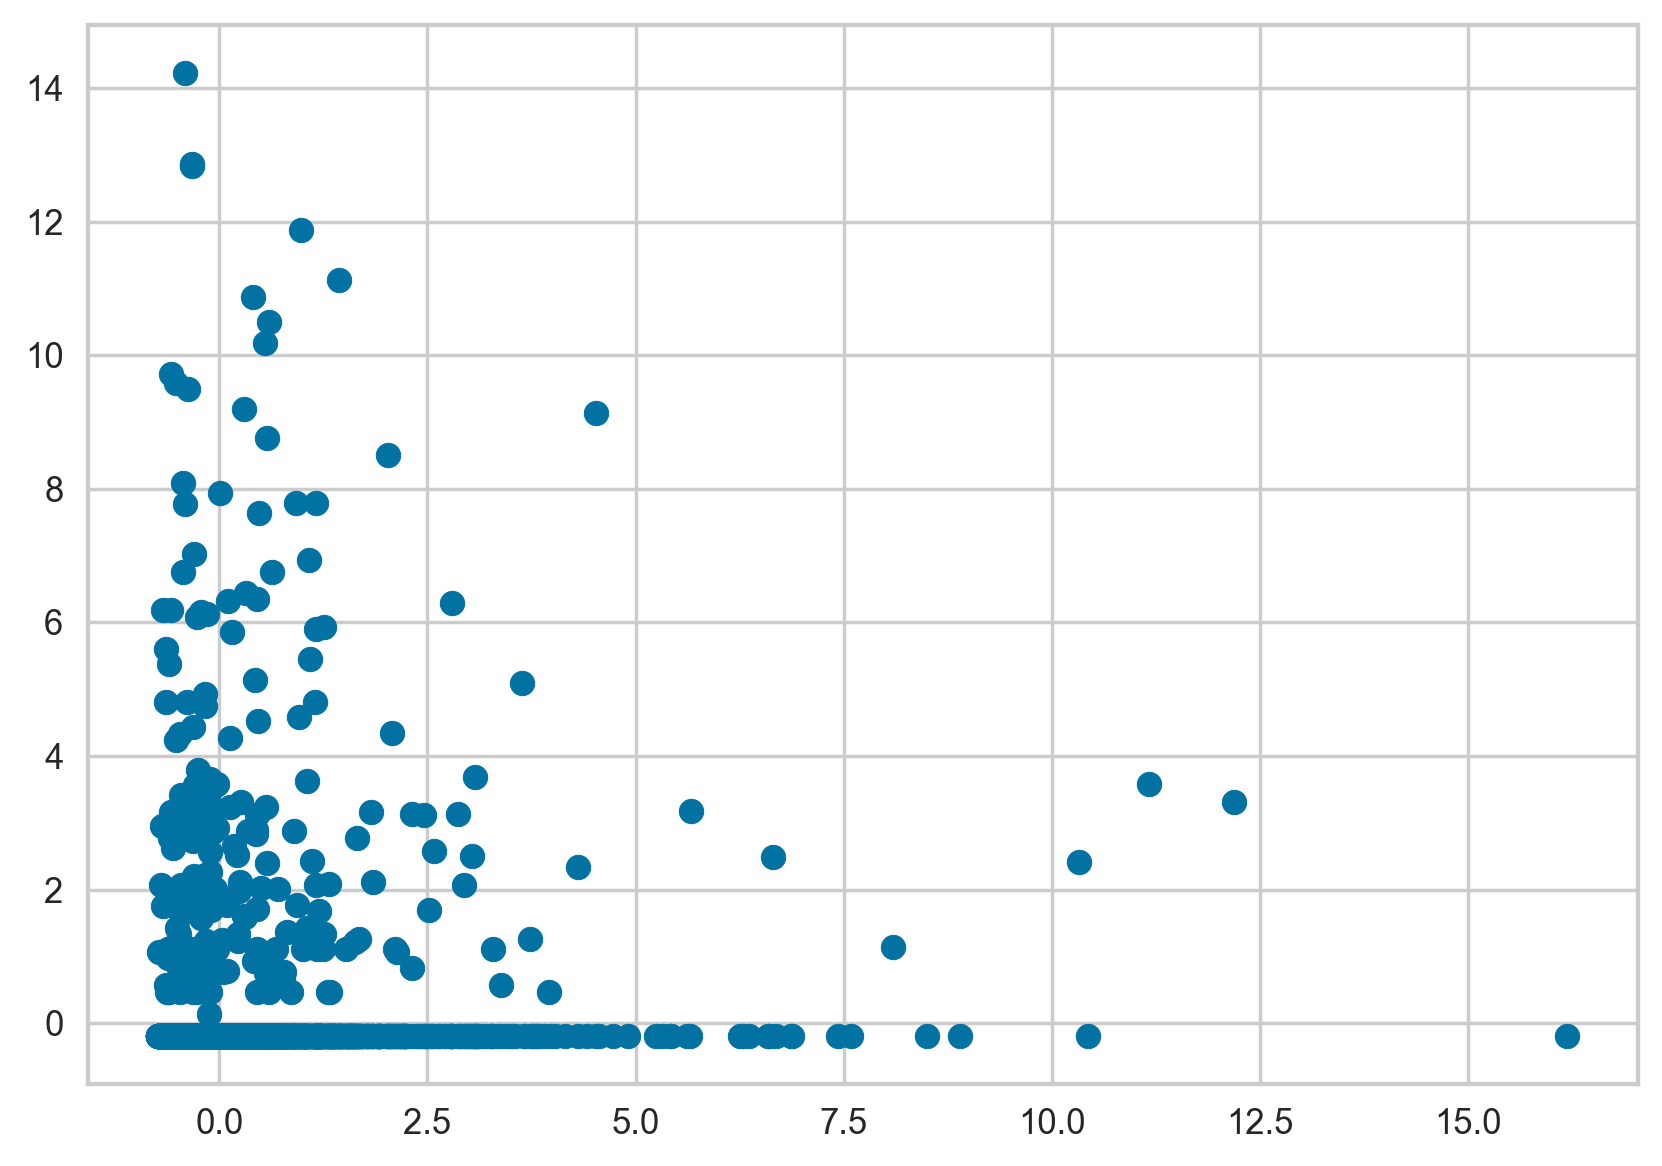

In [60]:
plt.scatter(x[:,0],x[:,1])

In [61]:
from sklearn.neighbors import NearestNeighbors

In [65]:
ne = NearestNeighbors(n_neighbors=3).fit(x)
d,i = ne.kneighbors(x)

In [66]:
pd.DataFrame(d)

0         1         2
0     0.0  0.111847  0.120342
1     0.0  0.114063  0.114376
2     0.0  0.165402  0.194589
3     0.0  0.048375  0.058575
4     0.0  0.545493  0.735055
...   ...       ...       ...
3994  0.0  0.288941  0.335142
3995  0.0  0.312801  0.343099
3996  0.0  0.166148  0.280243
3997  0.0  0.257255  0.271674
3998  0.0  0.002706  0.011296

[3999 rows x 3 columns]

In [68]:
dist = np.sort(d[:,1])
dist

array([0.00000000e+00, 0.00000000e+00, 2.26431613e-03, ...,
       6.61657940e+00, 6.67864158e+00, 7.46132314e+00])

Text(0, 0.5, 'Epsilion value')

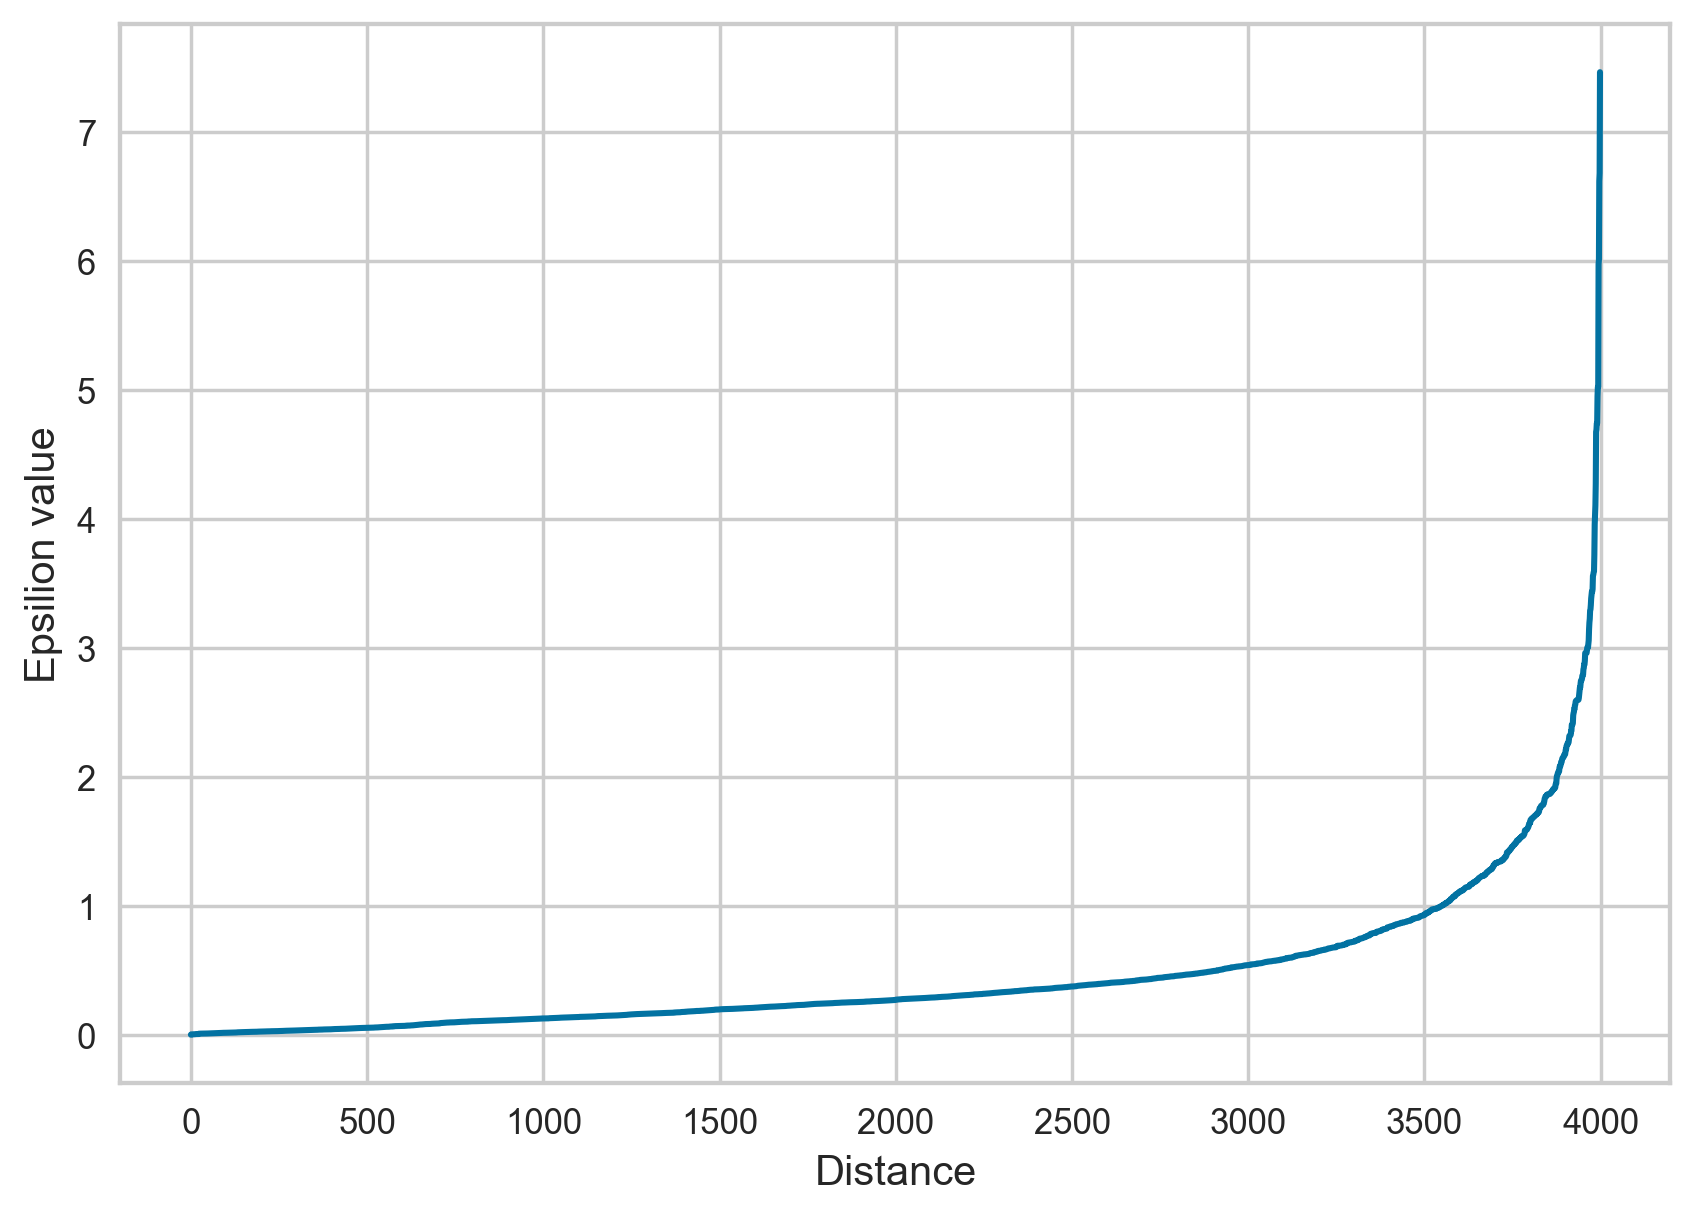

In [69]:
plt.plot(dist)
plt.xlabel('Distance')
plt.ylabel('Epsilion value')

In [71]:
db = DBSCAN(eps=0.35,min_samples=12)
y = db.fit_predict(x)

In [81]:
dp['cluster'] = y

In [83]:
dp

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award  cluster  
0         0        0  
1         0        0  
2         0        0  
3         0        0  
4         1       -1  
...     ...      ...  
3994      1       -1  
3995      1       -1  
3996      1       -1  
3997      0       -1  
3998      0        0  

[3999 rows x 12 columns]

In [88]:
dp['cluster'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       0
4      -1
       ..
3994   -1
3995   -1
3996   -1
3997   -1
3998    0
Name: cluster, Length: 3999, dtype: int64>

In [90]:
dp.groupby('cluster').agg('mean')

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
cluster                                                               
-1       101268.810419  225.739914   2.543674   1.022718   1.019193   
 0        22382.444260    0.000000   1.000000   1.000000   1.000000   
 1        19821.187500    0.000000   1.000000   1.000000   1.000000   
 2        26700.481481    0.000000   3.000000   1.000000   1.000000   
 3        60370.774194    0.000000   3.000000   1.000000   1.000000   
 4        54781.846154    0.000000   3.000000   1.000000   1.000000   
 5        14457.950000    0.000000   1.000000   1.000000   1.000000   
 6        28235.166667    0.000000   3.000000   1.000000   1.000000   
 7        24270.000000    0.000000   1.000000   1.000000   1.000000   
 8        44567.115385    0.000000   2.000000   1.000000   1.000000   
 9        47248.384615    0.000000   3.000000   1.000000   1.000000   
 10       80053.555556    0.000000   3.000000   1.000000   1.000000   
 11       20114.636364    0.000000   3.000000   1.000000   1.000000   

          Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
cluster                                                                  
-1       25205.775950    15.336467         714.359969         2.119076   
 0        1317.020799     4.019135          12.316140         0.060732   
 1         922.625000     0.687500           0.000000         0.000000   
 2       17423.296296    14.592593           9.259259         0.074074   
 3       16571.483871    12.870968           0.000000         0.000000   
 4       19629.923077    14.384615          11.538462         0.153846   
 5        1192.100000     1.850000           0.000000         0.000000   
 6       18190.333333    15.944444           8.333333         0.055556   
 7        2036.085106     2.127660          13.787234         0.106383   
 8        7905.230769    13.500000           0.000000         0.000000   
 9       15208.461538    14.038462           0.000000         0.000000   
 10      19513.666667    14.444444           0.000000         0.000000   
 11      13745.090909    13.636364           0.000000         0.000000   

         Days_since_enroll     Award  
cluster                               
-1             4487.453584  0.525656  
 0             3410.044093  0.000000  
 1             6293.250000  1.000000  
 2             5950.481481  1.000000  
 3             5646.129032  0.000000  
 4             4374.846154  0.000000  
 5             4416.000000  1.000000  
 6             3400.777778  1.000000  
 7             2432.297872  1.000000  
 8             2255.846154  0.000000  
 9             1927.307692  0.000000  
 10            2267.333333  0.000000  
 11            2590.818182  1.000000